<a href="https://colab.research.google.com/github/alexandergribenchenko/Data_Science_Toolkit/blob/main/Visualization/NB_01_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Variables categóricas Vs Variables categóricas

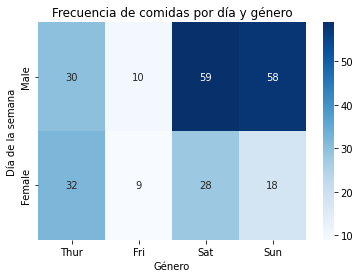

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos un dataframe con dos variables categóricas
data = sns.load_dataset('tips')

# Creamos una tabla de frecuencias con las dos variables categóricas
freq_table = pd.crosstab(data['sex'], data['day'])

# Creamos un subplot con Matplotlib
fig, ax = plt.subplots()

# Creamos el heatmap en el objeto Axes
sns.heatmap(data=freq_table, cmap='Blues', annot=True, fmt='d', ax=ax)

# Personalizamos el gráfico
ax.set_title('Frecuencia de comidas por día y género')
ax.set_xlabel('Género')
ax.set_ylabel('Día de la semana')

# Mostramos el gráfico
plt.show()


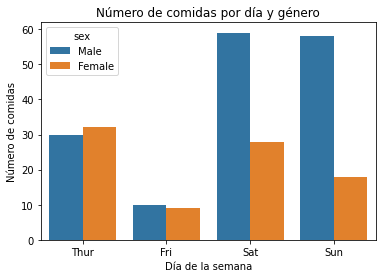

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un dataframe con dos variables categóricas
data = sns.load_dataset('tips')

# Creamos un gráfico de barras apiladas
sns.countplot(x='day', hue='sex', data=data)

# Personalizamos el gráfico
plt.title('Número de comidas por día y género')
plt.xlabel('Día de la semana')
plt.ylabel('Número de comidas')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Crear un DataFrame simulado para el gasto mensual por fuente
np.random.seed(42)
dates = pd.date_range('2022-01-01', '2023-12-31', freq='M')
n = len(dates)
sources = ['Source_A', 'Source_B', 'Source_C']
data = {
    'ad_spend_dt': np.repeat(dates, len(sources)),
    'clean_source': np.tile(sources, n),
    'sum_ad_spend': np.random.randint(1000, 5000, size=n * len(sources))
}

df_monthly_spend_by_source_filtered = pd.DataFrame(data)

In [ ]:
df_monthly_spend_by_source_filtered

,ad_spend_dt,clean_source,sum_ad_spend
0,2022-01-31,Source_A,4174
1,2022-01-31,Source_B,4507
2,2022-01-31,Source_C,1860
3,2022-02-28,Source_A,2294
4,2022-02-28,Source_B,2130
...,...,...,...
67,2023-11-30,Source_B,1600
68,2023-11-30,Source_C,3363
69,2023-12-31,Source_A,3061
70,2023-12-31,Source_B,1241


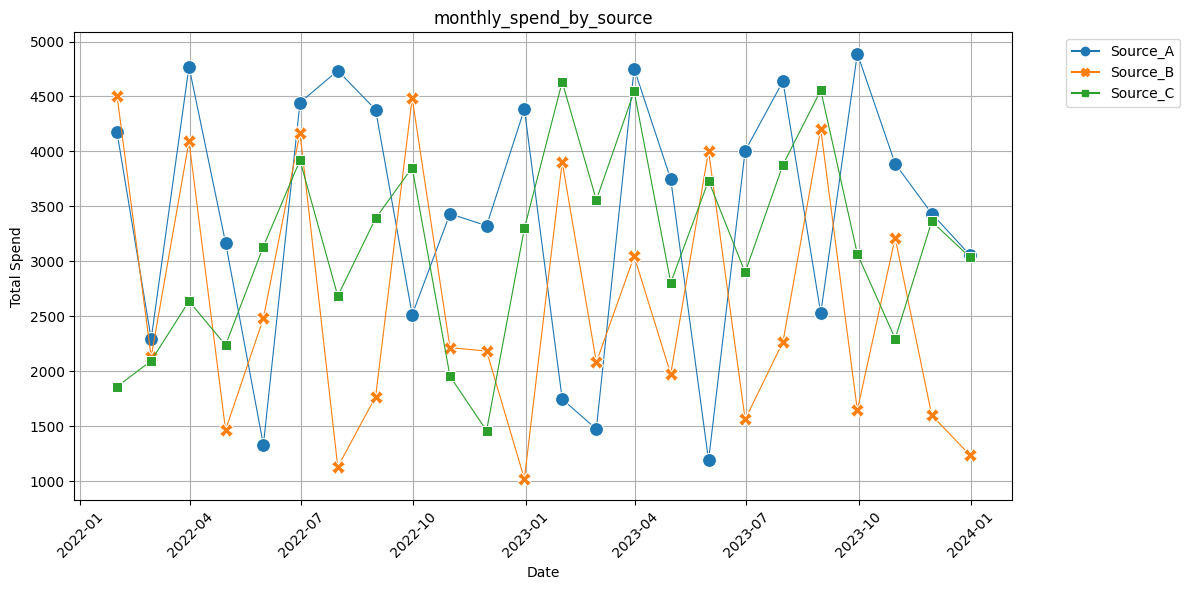

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_monthly_spend_by_source_filtered,
             x='ad_spend_dt',
             y='sum_ad_spend',
             hue='clean_source',
             style='clean_source',
             dashes=False,
             markers=True,
             markersize=10,
             linewidth=0.8,
             ax=ax)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('monthly_spend_by_source')
ax.set_xlabel('Date')
ax.set_ylabel('Total Spend')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

ax.grid(True)

plt.show()

# Otro gráfico

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear datos de ejemplo
data = {
    'days_to_hire': list(range(5, 68)),
    'count_abs': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68],
}

# Crear DataFrame
df = pd.DataFrame(data)

# Calcular columnas adicionales
df['count_abs_acomulative'] = df['count_abs'].cumsum()
df['count_abs_perc'] = (df['count_abs'] / df['count_abs_acomulative'] * 100).round(2)
df['count_perc_acomulative'] = df['count_abs_perc'].cumsum().round(2)

# Mostrar el DataFrame
df


,days_to_hire,count_abs,count_abs_acomulative,count_abs_perc,count_perc_acomulative
0,5,5,5,100.00,100.00
1,6,6,11,54.55,154.55
2,7,7,18,38.89,193.44
3,8,8,26,30.77,224.21
4,9,9,35,25.71,249.92
...,...,...,...,...,...
58,63,63,2006,3.14,633.97
59,64,64,2070,3.09,637.06
60,65,66,2136,3.09,640.15
61,66,67,2203,3.04,643.19


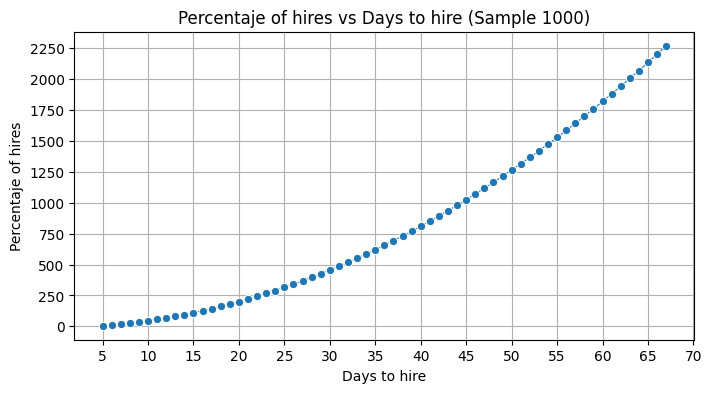

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(data=df,
            x='days_to_hire',
            y= 'count_abs_acomulative',
            linewidth=0.8,
            marker='o',
            markersize=6,
            ax=ax)

ax.set_title('Percentaje of hires vs Days to hire (Sample 1000)')
ax.set_xlabel('Days to hire')
ax.set_ylabel('Percentaje of hires')

ax.locator_params(axis='x', nbins=15)
ax.locator_params(axis='y', nbins=10)
ax.grid(True)

plt.show()